Aula introdutória de Python

In [ ]:
!pip install sidrapy
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import sidrapy

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
ipca_raw = sidrapy.get_table(table_code = '1737',
                            territorial_level = '1',
                            ibge_territorial_code = 'all',
                            variable = '2265',
                            period = 'all',
                            header = 'n')

In [ ]:
ipca_raw


In [5]:
ipca = (
        ipca_raw                        # metódo de encadeamento, semelhante ao pipe no R
        .loc[0:, ['V', 'D2C']]          #seleciona duas colunas
        .rename(columns = {'V': 'ipca', #renomeia as colunas
                          'D2C': 'date'})

)

In [ ]:
ipca = ipca.loc[ipca.date >= '2004-01-01'] #selecionando linhas
ipca['date'] = pd.to_datetime(ipca['date'],
                             format = '%Y%m') #fomatando as datas
ipca['ipca'] = ipca['ipca'].astype(float) #mudando o tipo de dados do ipca
ipca.describe()

In [ ]:
ipca

Fazendo Gráficos

<Axes: xlabel='date', ylabel='ipca'>

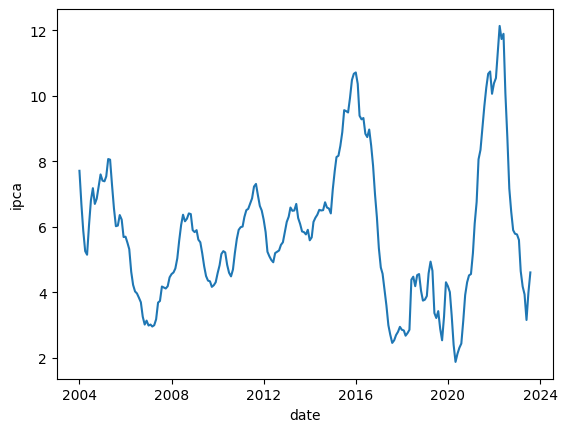

In [10]:
sns.lineplot(x = 'date',
            y = 'ipca',
            data = ipca)

In [ ]:
sns.histplot(x = 'ipca',
            data = ipca)

In [ ]:
sns.boxplot(y = 'ipca',
            data = ipca)

TAXA DE DESOCUPAÇÃO

In [12]:
# Taxa de desocupação - % - PNADC-M/IBGE
desocupacao_raw = sidrapy.get_table(table_code= "6381",
                                    territorial_level = "1",
                                    ibge_territorial_code = "all",
                                    variable = "4099",
                                    period = "all",
                                    header ='n')
# Realiza a limpeza e manipulação da tabela
desocupacao =  (
     desocupacao_raw
    .loc[0:,['V', 'D2C']]
    .rename(columns = {'V': 'desocupacao',
                       'D2C': 'date',}
            )
      )
# Transforma a coluna date em tipo datetime
desocupacao['date'] = pd.to_datetime(desocupacao['date'],
                                format = "%Y%m")

# Filtra os dados
desocupacao = desocupacao.loc[desocupacao.date > '2004-01-01']

# Transforma a coluna ipca em tipo float
desocupacao['desocupacao'] = desocupacao['desocupacao'].astype(float)

# Junta os dados
df_dados = pd.merge(ipca, desocupacao, on = 'date')

In [ ]:
df_dados

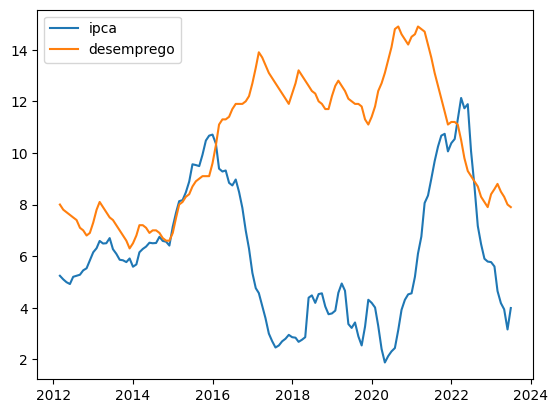

In [16]:
plt.plot('date',
         'ipca',
        data = df_dados,
        label = 'ipca')

plt.plot('date',
        'desocupacao',
        data = df_dados,
        label = 'desemprego')

plt.legend()

plt.show()

Regressão Linear

In [15]:
import statsmodels.formula.api as smf
modelo = smf.ols('ipca ~ desocupacao', data = df_dados).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ipca   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     10.55
Date:                Sun, 17 Sep 2023   Prob (F-statistic):            0.00147
Time:                        16:59:35   Log-Likelihood:                -318.81
No. Observations:                 137   AIC:                             641.6
Df Residuals:                     135   BIC:                             647.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.8344      0.885      9.985      0.000       7.085      10.584
desocupacao    -0.2679      0.082     -3.248      0.001      -0.431      -0.105
==============================================================================
Omnibus:                       15.438   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.366
Skew:                           0.801   Prob(JB):                     0.000279
Kurtosis:                       2.451   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='desocupacao', ylabel='ipca'>

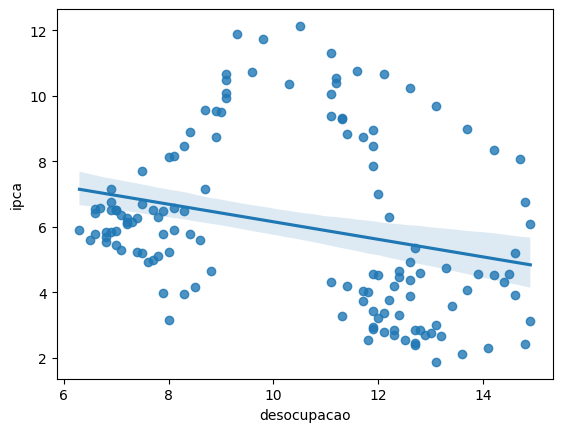

In [21]:
sns.regplot(x = 'desocupacao',
           y = 'ipca',
           data = df_dados)